# Estadística Aplicada.
## Alan Fernando Del Real Almaguer, 1918760.
### 14ta Sesión, 29 de Marzo 2023.

# Pasajeros Metrorrey.

In [1]:
# Importamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import seasonal_decompose
%matplotlib inline

In [6]:
# Cargamos los datos.
metrorrey = pd.read_csv('metrorrey.csv')

In [7]:
# Primeros cinco registros
metrorrey.head()

,Mes,Pasajeros,Ingreso
0,2008/01,5869.0,16979.0
1,2008/02,6499.0,18516.0
2,2008/03,5801.0,16719.0
3,2008/04,6932.0,17663.0
4,2008/05,6876.0,21079.0


**Siempre que trabajemos con series de tiempo debemos "declarar" una variable con formato de tiempo y debemos convertirla en el index.**

In [8]:
# Convertimos a "Mes" en fecha con pandas y mostramos los datos
metrorrey['Mes'] = pd.to_datetime(metrorrey['Mes'], format = '%Y/%m')
metrorrey.head()

,Mes,Pasajeros,Ingreso
0,2008-01-01,5869.0,16979.0
1,2008-02-01,6499.0,18516.0
2,2008-03-01,5801.0,16719.0
3,2008-04-01,6932.0,17663.0
4,2008-05-01,6876.0,21079.0


In [9]:
# Convertimos el mes en el index y mostramos los datos
metrorrey = metrorrey.set_index('Mes')
metrorrey.head()

,Pasajeros,Ingreso
Mes,,
2008-01-01,5869.0,16979.0
2008-02-01,6499.0,18516.0
2008-03-01,5801.0,16719.0
2008-04-01,6932.0,17663.0
2008-05-01,6876.0,21079.0


In [10]:
# Hay que declarar la frecuencia de los datos mensuales 'monthly series', que se abrevia como MS.
metrorrey.index.freq = 'MS'

In [11]:
# Verificamos que esto sea correcto
metrorrey.index

DatetimeIndex(['2008-01-01', '2008-02-01', '2008-03-01', '2008-04-01',
               '2008-05-01', '2008-06-01', '2008-07-01', '2008-08-01',
               '2008-09-01', '2008-10-01',
               ...
               '2022-04-01', '2022-05-01', '2022-06-01', '2022-07-01',
               '2022-08-01', '2022-09-01', '2022-10-01', '2022-11-01',
               '2022-12-01', '2023-01-01'],
              dtype='datetime64[ns]', name='Mes', length=181, freq='MS')

**Si el dataframe ya tiene una variable de fecha, una frecuencia y es el index; ya se pueden emplear las herramientas de análisis de series de tiempo.**

**Para corroborar lo anterior, hay que usar:**

df.index

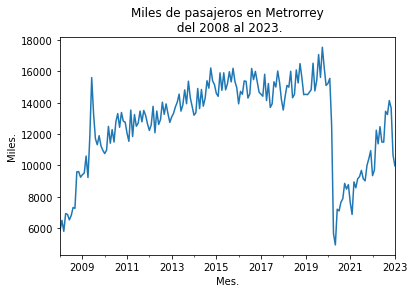

In [15]:
# Graficamos los datos.

# Graficamos el número de pasajeros.
metrorrey['Pasajeros'].plot()
plt.title('Miles de pasajeros en Metrorrey\n del 2008 al 2023.')
plt.ylabel('Miles.')
plt.xlabel('Mes.')
plt.show()

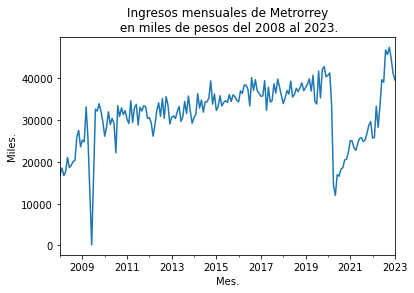

In [16]:
# Graficamos el ingreso
metrorrey['Ingreso'].plot()
plt.title('Ingresos mensuales de Metrorrey\n en miles de pesos del 2008 al 2023.')
plt.ylabel('Miles.')
plt.xlabel('Mes.')
plt.show()

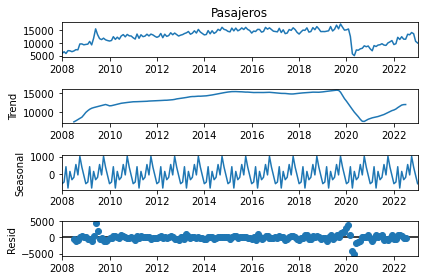

In [17]:
# Descomponemos los componentes de los pasajeros
serie1 = seasonal_decompose(metrorrey['Pasajeros'], model = 'ad')
serie1.plot()
plt.show()

In [19]:
# Vamos a revisar en que meses hay mas pasajeros en Metrorrey
serie1.seasonal.iloc[0:12]

Mes
2008-01-01    -565.338211
2008-02-01    -467.710291
2008-03-01     417.269947
2008-04-01    -815.748883
2008-05-01     145.240614
2008-06-01    -332.910830
2008-07-01    -196.040026
2008-08-01     544.016519
2008-09-01     -56.829133
2008-10-01    1016.647513
2008-11-01     392.821051
2008-12-01     -81.418270
Freq: MS, Name: seasonal, dtype: float64

- **Los meses donde hay mas pasajeros son:**

1. Marzo.
2. Mayo.
3. Agosto.
4. Octubre.
5. Noviembre.

- **Los meses donde hay menos pasajeros son:**

1. Enero.
2. Febrero.
3. Abril.
4. Junio.
5. Julio.
6. Septiembre.
7. Diciembre.